In [1]:
import os
os.chdir('/home/zzy/robot/robot_zzy/diffusion_policy')
import hydra
d = {'_target_': 'diffusion_policy.dataset.robomimic_replay_image_dataset.RobomimicReplayImageDataset', 
     'shape_meta': {'obs': {'agentview_image': {'shape': [3, 84, 84], 'type': 'rgb'}, 
                            'robot0_eye_in_hand_image': {'shape': [3, 84, 84], 'type': 'rgb'}, 
                            'robot0_eef_pos': {'shape': [3]}, 
                            'robot0_eef_quat': {'shape': [4]}, 
                            'robot0_gripper_qpos': {'shape': [2]}}, 
                    'action': {'shape': [7]}}, 
     'dataset_path': 'data/robomimic/datasets/lift/ph/image.hdf5', 
     'horizon': 60, 
     'pad_before': 0, 
     'pad_after': 0, 
     'n_obs_steps': 60, 
     'abs_action': False, 
     'rotation_rep': 'rotation_6d', 
     'use_legacy_normalizer': False, 
     'use_cache': False, 
     'seed': 42, 
     'val_ratio': 0.02}
import zzy_utils
# zzy_utils.pretty_print(d)
dataset = hydra.utils.instantiate(d)
print(dataset)

Loading image data: 100%|██████████| 19332/19332 [00:06<00:00, 3030.36it/s]

{
    "obs":
        {
            "agentview_image":
                tensor((60, 3, 84, 84), float32, cpu)
            "robot0_eye_in_hand_image":
                tensor((60, 3, 84, 84), float32, cpu)
            "robot0_eef_pos":
                tensor((60, 3), float32, cpu)
            "robot0_eef_quat":
                tensor((60, 4), float32, cpu)
            "robot0_gripper_qpos":
                tensor((60, 2), float32, cpu)
        }
    "action":
        tensor((60, 7), float32, cpu)
}



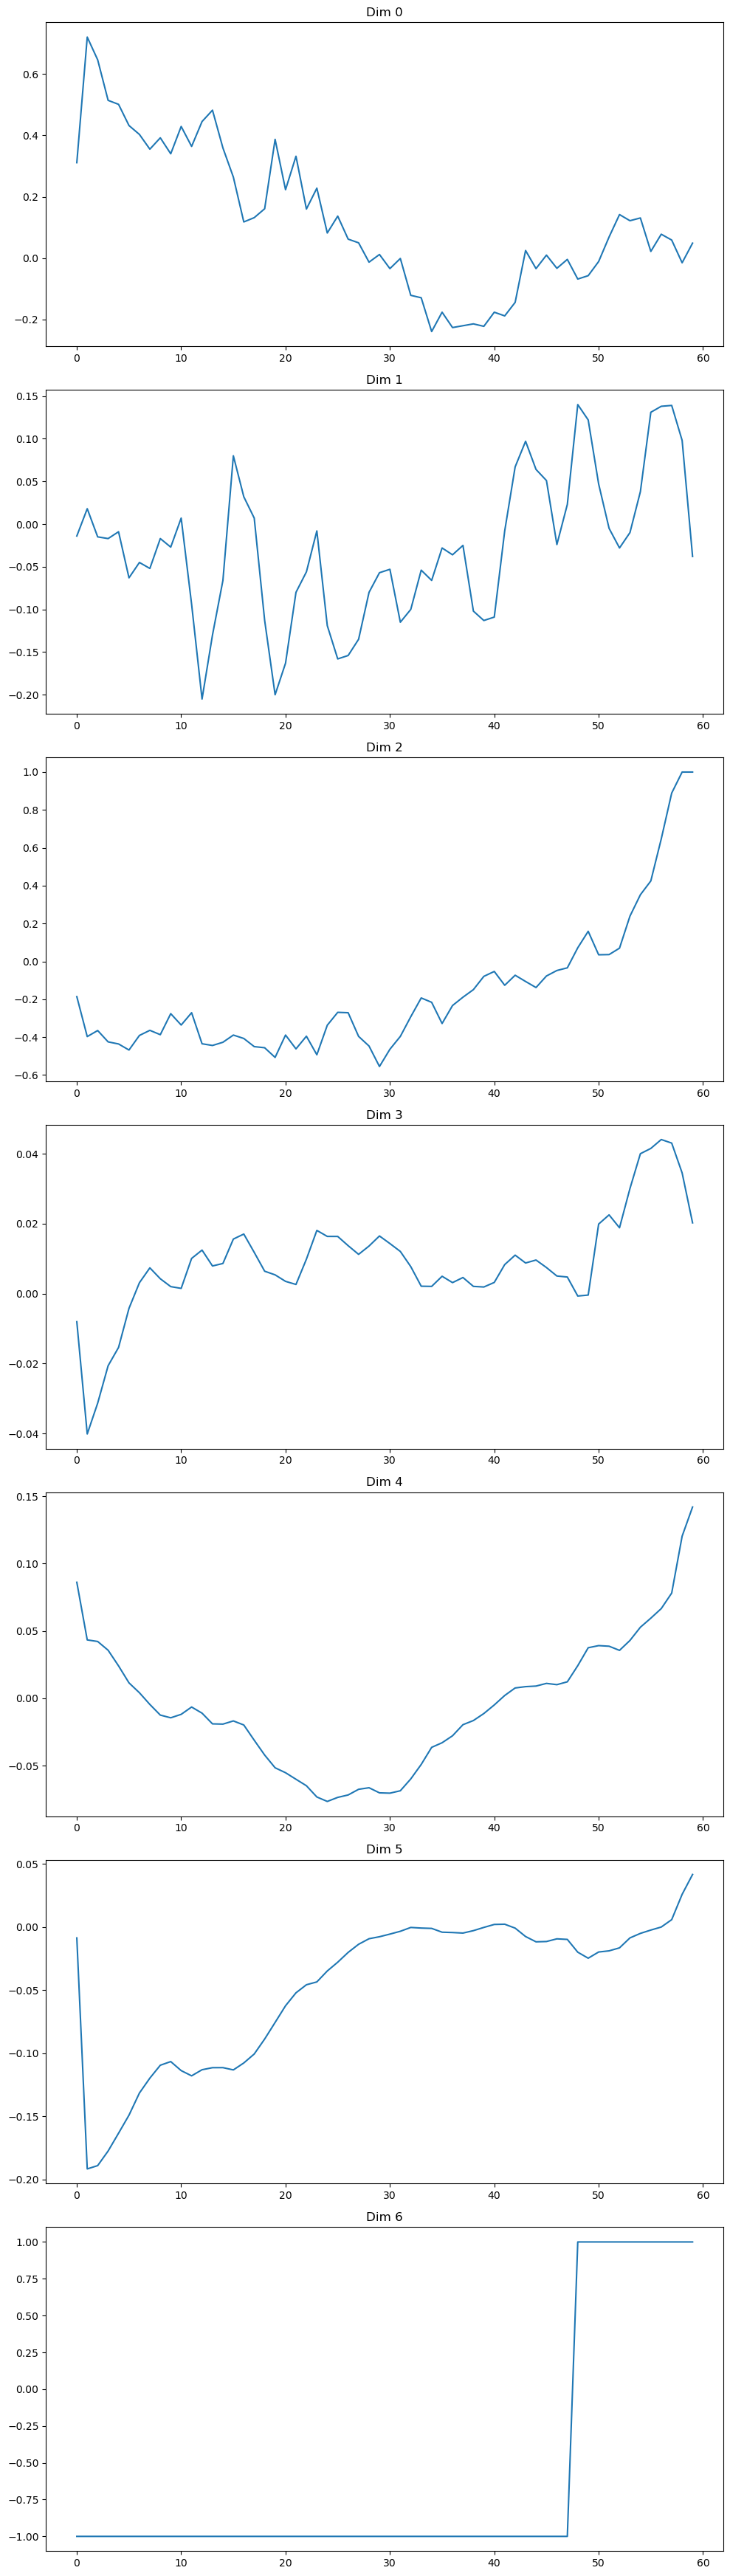

In [19]:
import zzy_utils
import numpy as np
# zzy_utils.pretty_print(dataset[0])
# zzy_utils.visualize_time_series_data(np.concatenate((dataset[0]['action'], dataset[1]['action']), 0), 0)
# zzy_utils.visualize_images(dataset[0]['obs']['agentview_image'], resize_shape=(224, 224), fps=20)
# zzy_utils.visualize_images(dataset[1]['obs']['agentview_image'], resize_shape=(224, 224), fps=20)
# zzy_utils.visualize_image_notebook(dataset[0]['obs']['agentview_image'][0], resize_shape=(224, 224))
# zzy_utils.visualize_images(dataset[0]['obs']['agentview_image'], resize_shape=(224, 224))
zzy_utils.pretty_print(dataset[0])
zzy_utils.visualize_time_series_data(dataset[0]['action'], 0)

In [10]:
zzy_utils.visualize_images(dataset[0]['obs']['agentview_image'], resize_shape=(224, 224), verbose=False, fps=20)
zzy_utils.visualize_images(dataset[20]['obs']['agentview_image'], resize_shape=(224, 224), verbose=False, fps=20)

In [26]:
from pathlib import Path
import pickle
action_path = Path('/home/zzy/robot/robot_zzy/diffusion_policy/diffusion_policy/env_runner/env_actions.pkl')
with action_path.open('rb') as f:
    env_actions = pickle.load(f)
    # env_actions = np.concatenate(env_actions, axis=1)[0]
env_actions['qpos'] = dataset[0]['action'].numpy()
zzy_utils.pretty_print(env_actions)
# write back
# with action_path.open('wb') as f:
#     pickle.dump(env_actions, f)

{
    "abs":
        array((104, 7), float32)
    "qpos":
        array((60, 7), float32)
}



{
    "abs":
        array((104, 7), float32)
}



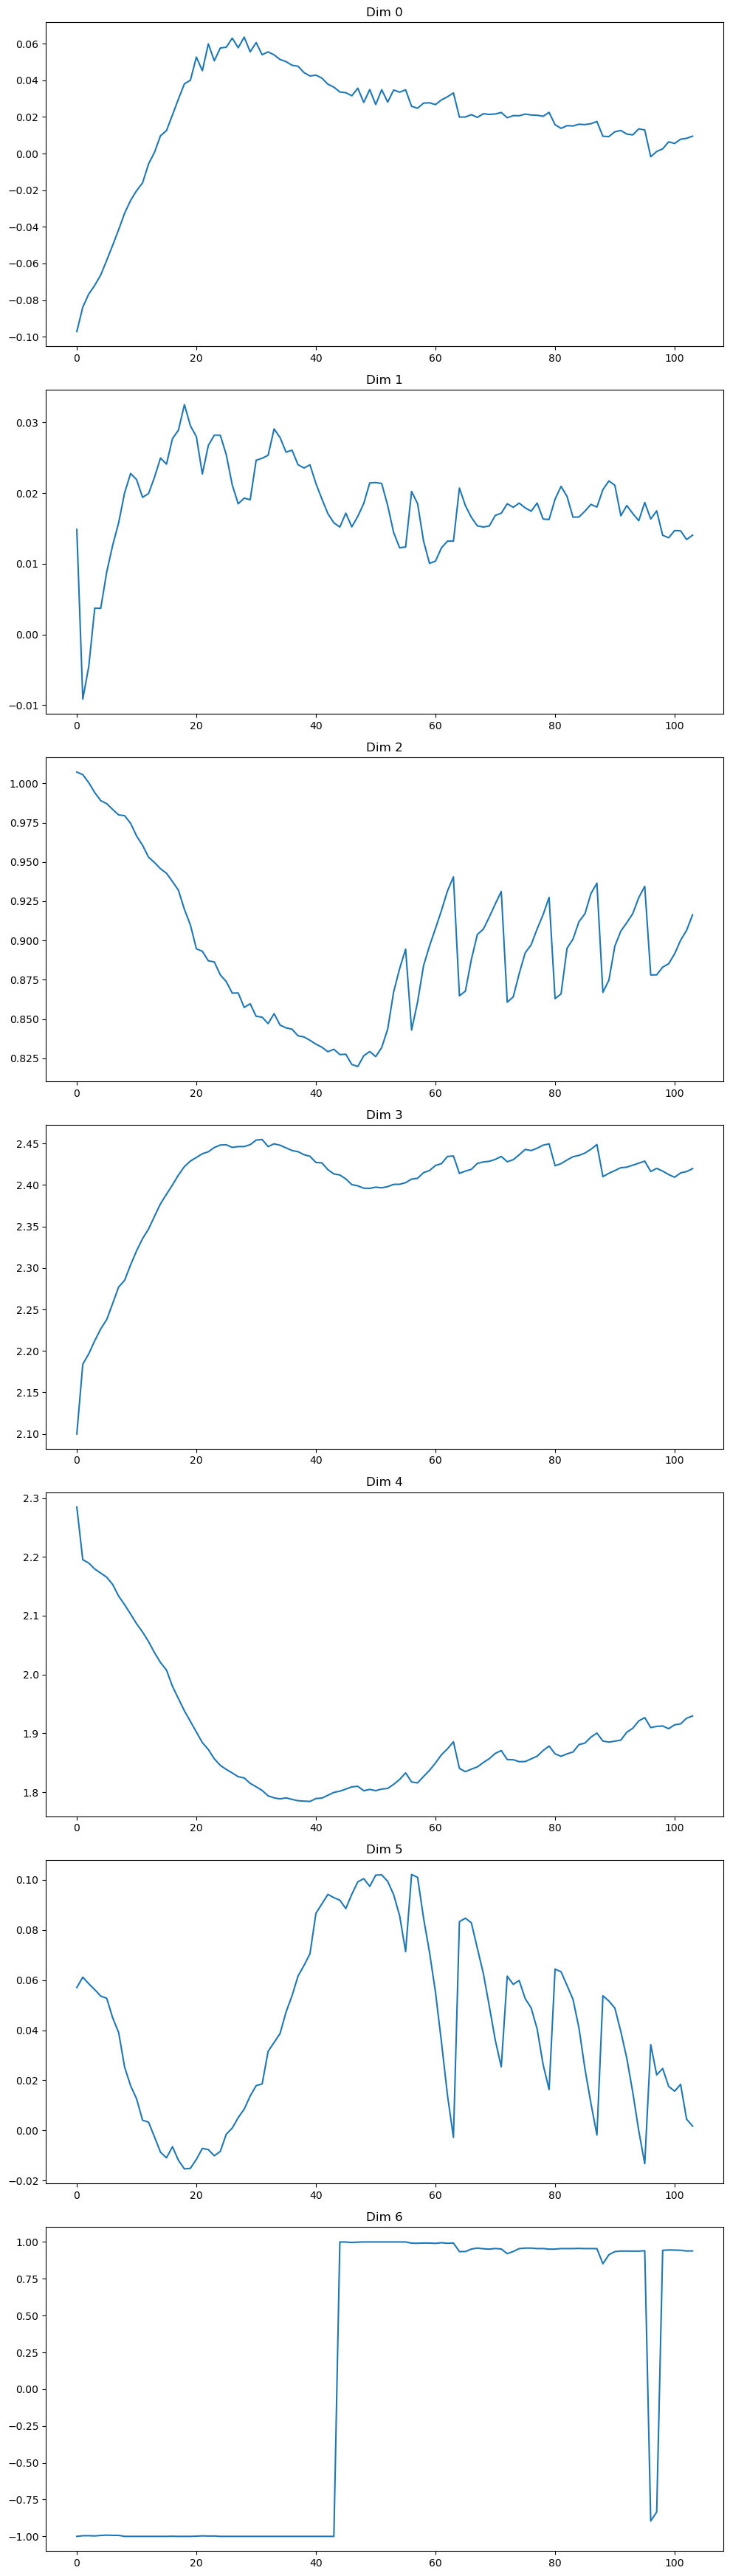

In [11]:
from pathlib import Path
import pickle
import numpy as np
action_path = Path('/home/zzy/robot/robot_zzy/diffusion_policy/diffusion_policy/env_runner/env_actions.pkl')
with action_path.open('rb') as f:
    env_actions = pickle.load(f)
    # env_actions = np.concatenate(env_actions, axis=1)[0]
zzy_utils.pretty_print(env_actions)
# import zzy_utils
# zzy_utils.pretty_print(env_actions)
zzy_utils.visualize_time_series_data(env_actions["abs"], 0)
# env_actions = {'abs': env_actions}
# with action_path.open('wb') as f:
#     pickle.dump(env_actions, f)

In [5]:
import numpy as np
# print(np.round(dataset[0]['action'].numpy(), 3))
normalizer = dataset.get_normalizer()

zzy_utils.plot_time_series_data(dataset[0]['action'], 0)
zzy_utils.plot_time_series_data(normalizer['action'](dataset[0]['action']), 0)

AttributeError: module 'zzy_utils' has no attribute 'plot_time_series_data'

In [ ]:
print(np.round(dataset[0]['obs']['robot0_eef_pos'].numpy(), 3))
# print(np.round(dataset[0]['obs']['robot0_eef_quat'].numpy(), 3))
# print(np.round(dataset[0]['obs']['robot0_gripper_qpos'].numpy(), 3))

[[-1.060e-01  1.400e-02  1.004e+00]
 [-1.040e-01  1.200e-02  1.003e+00]
 [-9.900e-02  8.000e-03  9.990e-01]
 [-9.200e-02  5.000e-03  9.940e-01]
 [-8.500e-02  3.000e-03  9.880e-01]
 [-7.800e-02  2.000e-03  9.820e-01]
 [-7.200e-02  2.000e-03  9.760e-01]
 [-6.700e-02  2.000e-03  9.700e-01]
 [-6.100e-02  3.000e-03  9.650e-01]
 [-5.600e-02  3.000e-03  9.600e-01]
 [-5.100e-02  3.000e-03  9.560e-01]
 [-4.600e-02  3.000e-03  9.510e-01]
 [-4.100e-02  3.000e-03  9.470e-01]
 [-3.600e-02  2.000e-03  9.420e-01]
 [-3.000e-02  1.000e-03  9.370e-01]
 [-2.500e-02  0.000e+00  9.310e-01]
 [-2.000e-02  0.000e+00  9.250e-01]
 [-1.700e-02  1.000e-03  9.200e-01]
 [-1.500e-02  1.000e-03  9.150e-01]
 [-1.200e-02  0.000e+00  9.100e-01]
 [-8.000e-03 -1.000e-03  9.040e-01]
 [-4.000e-03 -3.000e-03  8.980e-01]
 [ 0.000e+00 -4.000e-03  8.920e-01]
 [ 3.000e-03 -5.000e-03  8.860e-01]
 [ 7.000e-03 -5.000e-03  8.810e-01]
 [ 9.000e-03 -5.000e-03  8.760e-01]
 [ 1.100e-02 -6.000e-03  8.720e-01]
 [ 1.200e-02 -7.000e-03  8.6